# Heart Disease Prediction Project

### Overview:
This repository contains a project focused on heart disease prediction. The data, derived from heart patients, includes various health metrics such as age, blood pressure, heart rate, and more. The primary objective is to create a predictive model that accurately identifies individuals at risk of heart disease. The emphasis is on achieving a high recall to ensure no potential heart disease case is missed.

### Problem:
In this project, they delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. The goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

### Objectives:
1. Data Understanding: Familiarize ourselves with the dataset and its features.

2. Exploratory Data Analysis (EDA): Unveil patterns, trends, and relationships between different variables.
- Univariate Analysis
- Bivariate Analysis

3. Data Preprocessing: Prepare the data for future machine learning tasks.
- Remove irrelevant features
- Address missing values
- Treat outliers
- Encode categorical variables
- Transform skewed features to achieve normal-like distributions

4. Model Building: Develop and refine the prediction models.
- Establish pipelines for models that require scaling
- Implement and tune classification models including Decision Tree, Random Forest, KNN & SVM
- Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients

5. Evaluate and Compare Model Performance: Utilize precision, recall, and F1-score to gauge models' effectiveness.

### Key Features:
- `age` : Age of the patient in years.
- `sex` : Gender of the patient (0 = male, 1 = female).
- `cp` : Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).
- `trestbps` : Resting blood pressure in mm Hg.
- `chol` : Serum cholesterol in mg/dl.
- `fbs` : Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false).
- `restecg` : Resting electrocardiographic results (0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy).
- `thalach` : Maximum heart rate achieved during a stress test.
- `exang` : Exercise-induced angina (1 = yes, 0 = no).
- `oldpeak` : ST depression induced by exercise relative to rest.
- `slope` : Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping).
- `ca` : Number of major vessels (0-4) colored by fluoroscopy.
- `thal` : Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described).
- `target` : Heart disease status (0 = no disease, 1 = presence of disease).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read dataset & Overview of the data

In [2]:
data = pd.read_csv('Data/heart.csv', sep = ',')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
print("Train Dataset: ", data.shape)

Train Dataset:  (303, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dựa trên các loại dữ liệu và các giải thích tính năng mà chúng tôi có trước đó, chúng ta có thể thấy rằng 9 cột (giới tính, CP, FBS, RESTECG, EXANG, Slope, CA, Thal và Target) thực sự là số về loại dữ liệu, nhưng phân loại về mặt ngữ nghĩa của họ. Các tính năng này nên được chuyển đổi thành kiểu dữ liệu chuỗi (object) để phân tích và giải thích thích hợp:

In [6]:
# Xac dinh cac bien lien tuc (continuous features)
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Xac dinh cac bien ko lien tuc
features_to_convert = [feature for feature in data.columns if feature not in continuous_features]

# Chuyen doi kieu du lieu tu int64 sang object
data[features_to_convert] = data[features_to_convert].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [7]:
# Nhan so lieu thong ke mo ta cua cac bien so
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
# Nhan so lieu thong ke mo ta cua cac bien phan loai (categorical variables)
data.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


## Exploratory Data Analysis (EDA)

1. Univariate Analysis: focus on one feature at a time to understand its distribution and range.

2. Bivariate Analysis: explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: predicting the target variable.

### 1. Univariate Analysis

- For continuous data: employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

- For categorical data: bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

#### 1.1 Numerical Variables Univariate Analysis

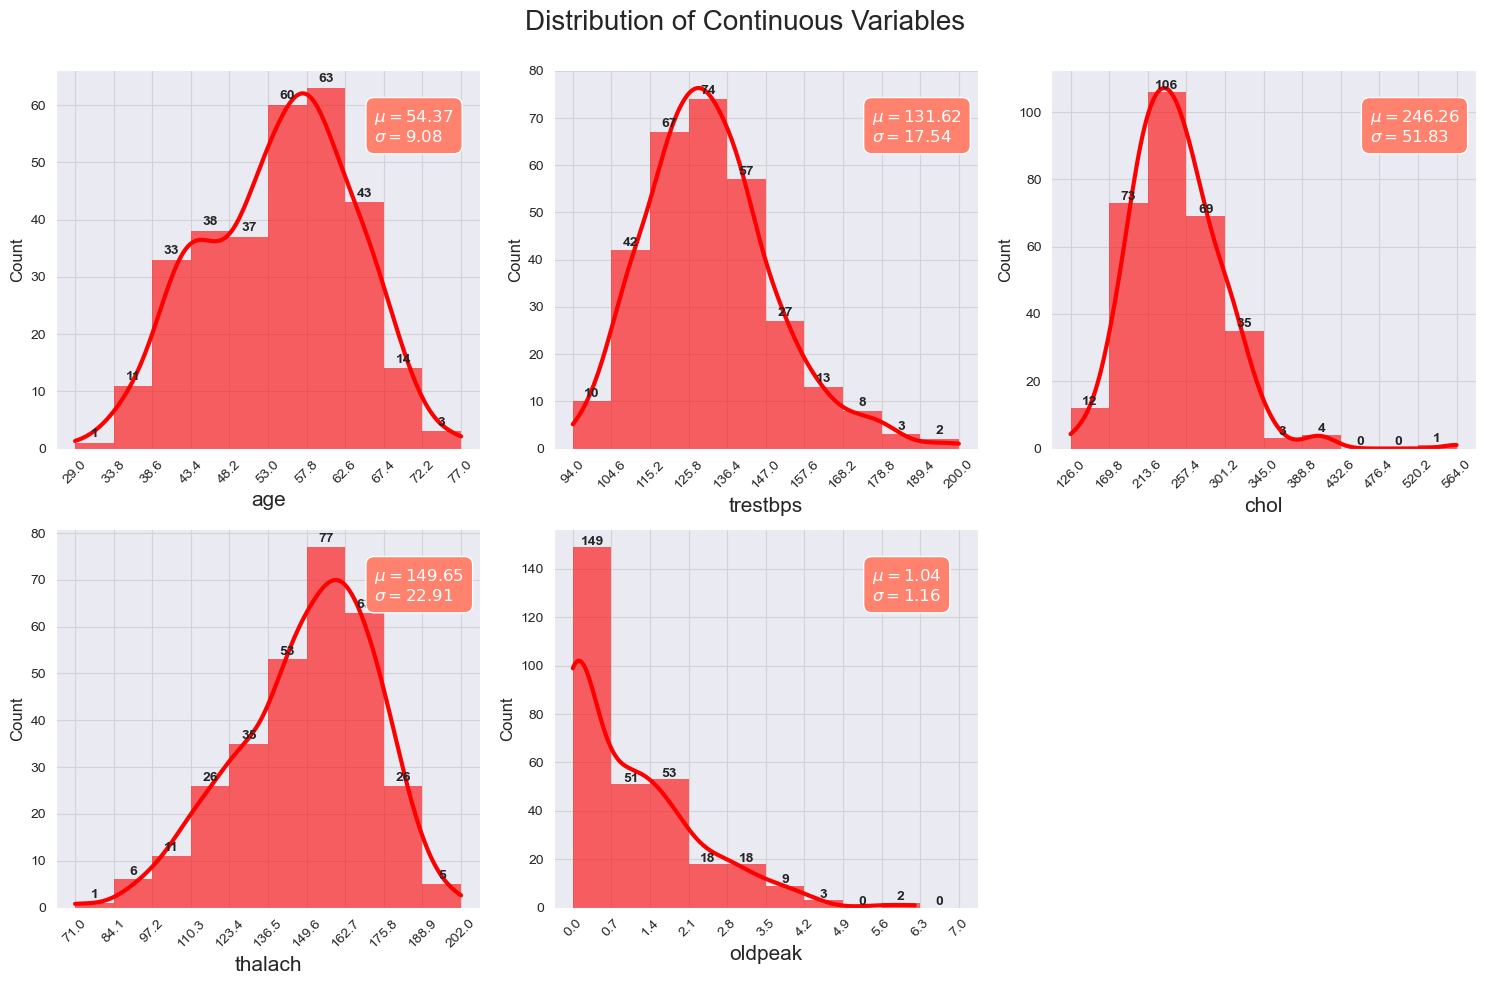

In [9]:
# Loc cac bien lien tuc
data_continuous = data[continuous_features]

# Tao subplot de ve bieu do
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Vong lap de ve histogram cho tung cot
for i, col in enumerate(data_continuous.columns):
    x = i // 3
    y = i % 3
    
    # Tao histogram
    values, bin_edges = np.histogram(data_continuous[col], range=(np.floor(data_continuous[col].min()), np.ceil(data_continuous[col].max())))

    graph = sns.histplot(data=data_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y], edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    
    # Tinh chinh bieu do
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    # Them gia tri so tren tung cot
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center', fontsize=10, fontweight="bold")

    # Hien thi gia tri trung binh & do lech chuan
    textstr = '\n'.join((r'$\mu=%.2f$' % data_continuous[col].mean(), r'$\sigma=%.2f$' % data_continuous[col].std()))
    
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top', color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Bo o trong thua & tinh chinh layout
ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

#### 1.2 Categorical Variables Univariate Analysis

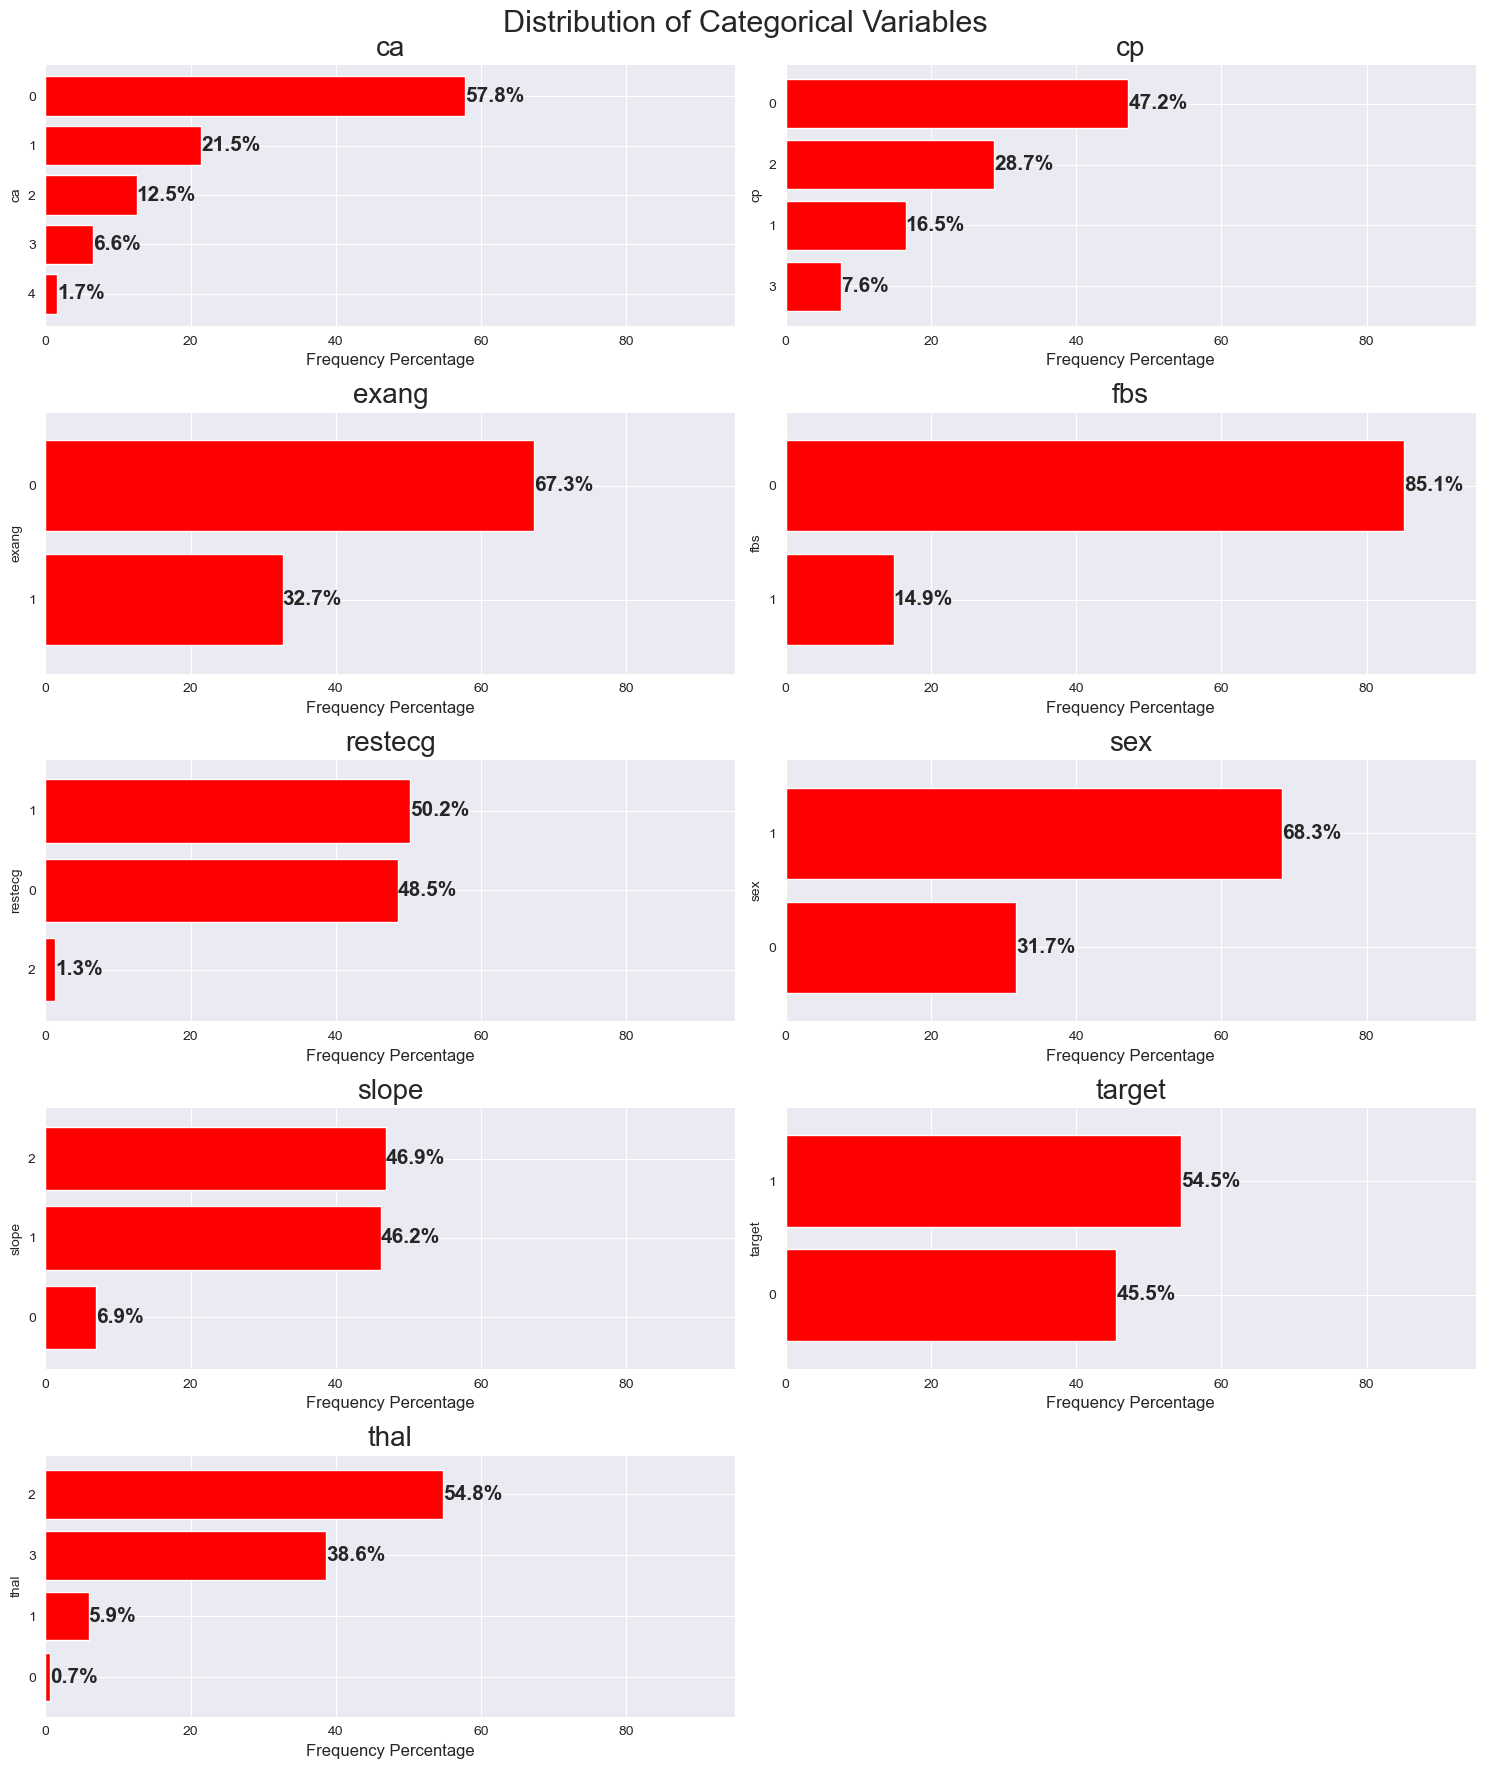

In [10]:
# Loc cac bien phan loai de phan tich don bien
categorical_features = data.columns.difference(continuous_features)
data_categorical = data[categorical_features]

# Tao layout subplot
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Vong lap ve bieu do cho tung bien phan loai
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Tinh toan tan suat %
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()

    # Ve bieu do ngang
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Them nhan gia tri len bieu do
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    # Tinh chinh bieu do
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Bo o trong thua & tinh chinh layout
ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### 2. Bivariate Analysis

- For continuous data: I am going to use bar plots to showcase the average value of each feature for the different target classes, and KDE plots to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

- For categorical data: I am going to employ 100% stacked bar plots to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target.

Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

#### 2.1 Numerical Features vs Target

To visualize each continuous feature against the target using two types of charts:

- Bar plots - showing the mean values.
- KDE plots - displaying the distribution for each target category.

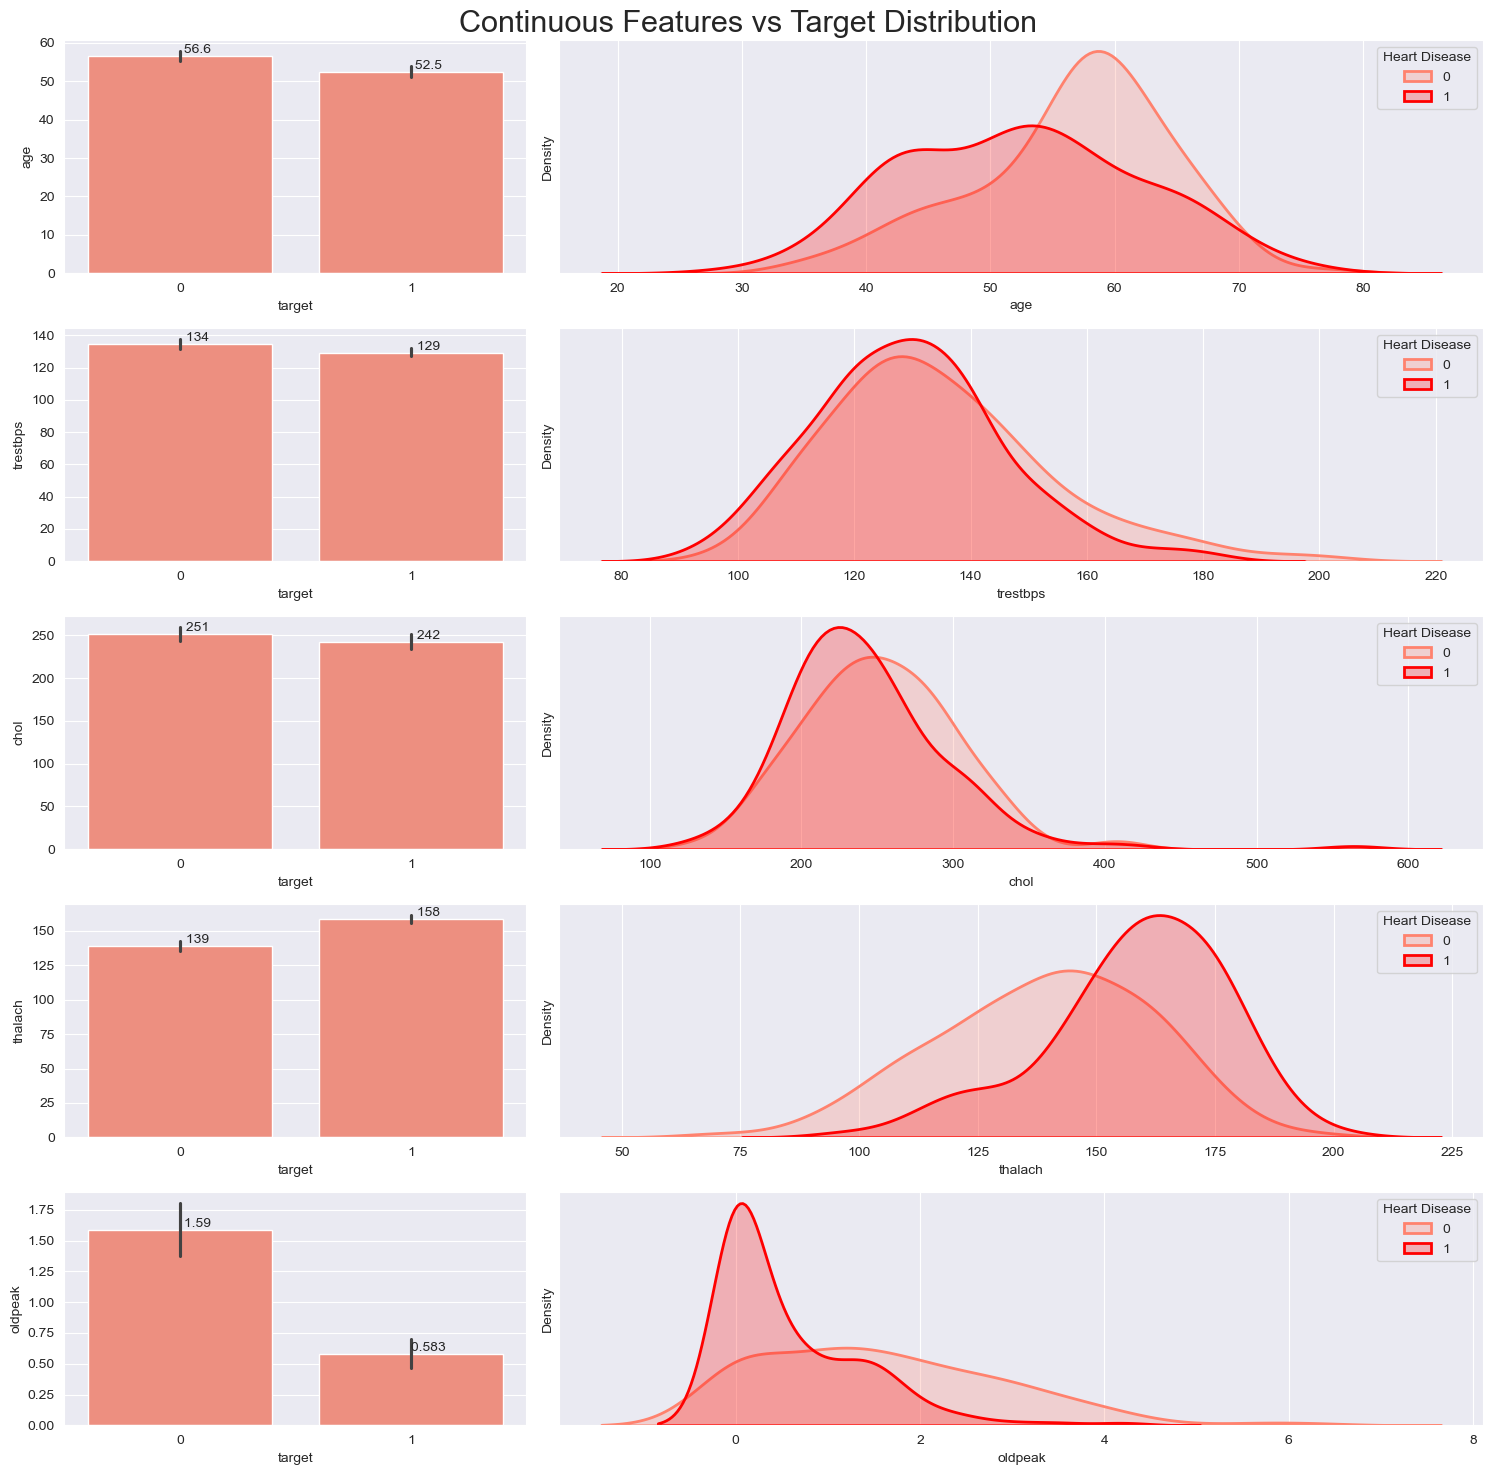

In [11]:
# Thiet lap mau sac
sns.set_palette(['#ff826e', 'red'])

# Tao layout subplot
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Vong lap ve bieu do
for i, col in enumerate(continuous_features):
    
    # Ve bieu do cot (Barplot)
    graph = sns.barplot(data=data, x="target", y=col, ax=ax[i,0])

    # Ve bieu do phan bo mat do (KDE plot)
    sns.kdeplot(data=data[data["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    
    # Tinh chinh bieu do
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Them chu thich vao barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Them tieu de & hien thi bieu do
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

#### 2.2 Categorical Features vs Target

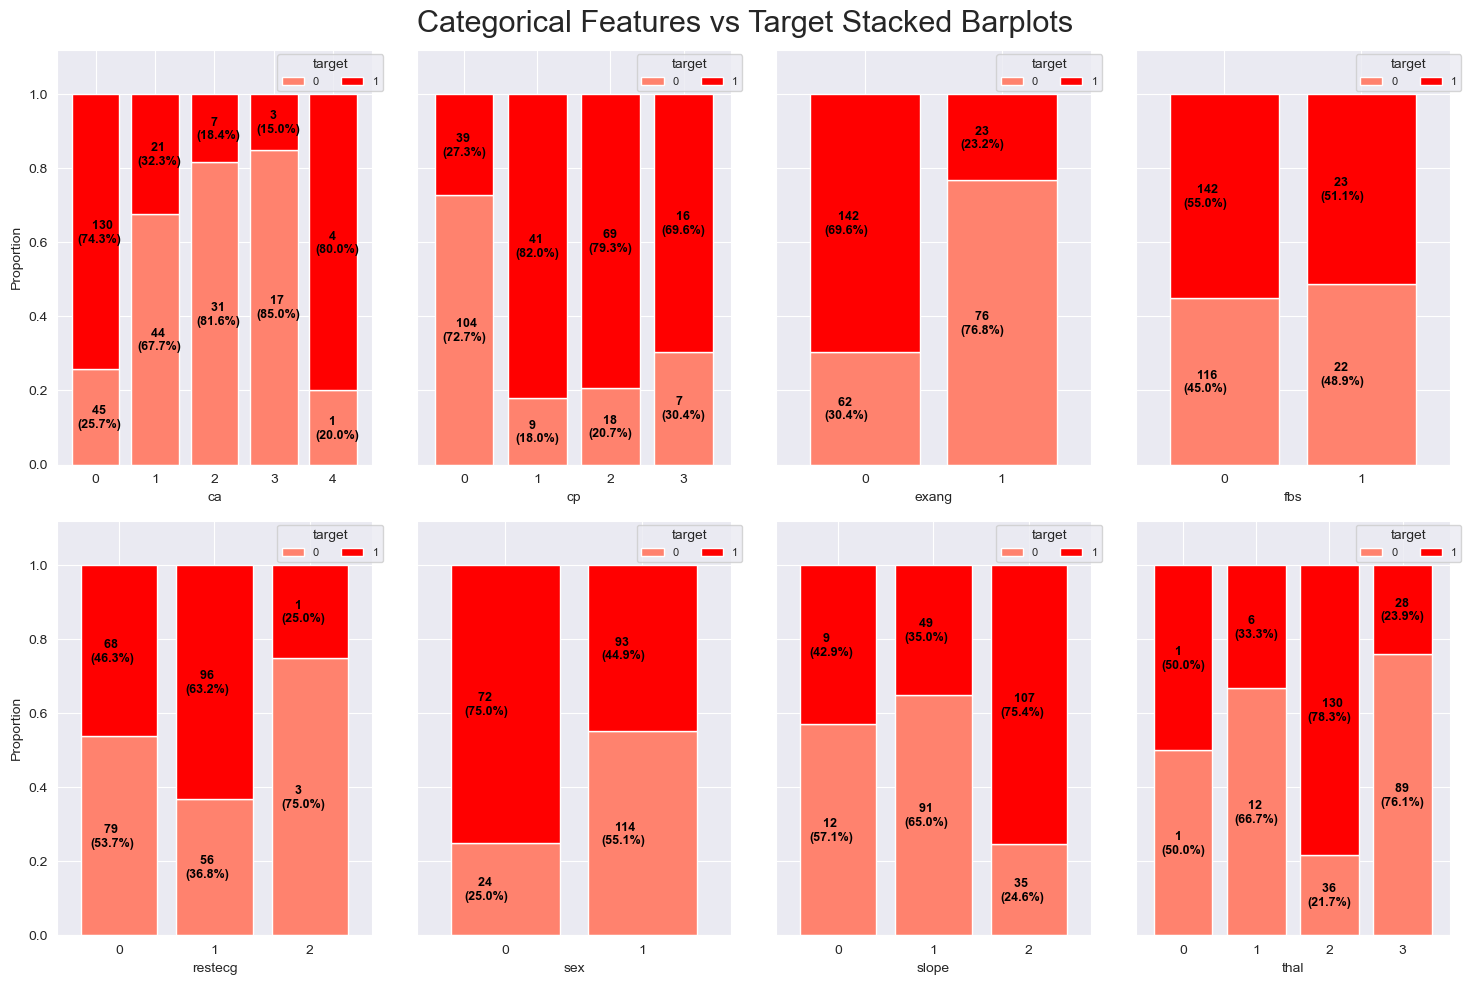

In [12]:
# Loai bo 'target' khoi cac bien phan loai
categorical_features = [feature for feature in categorical_features if feature != 'target']

#  Tao layout cho subplot
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

# Vong lap qua tung bien phan loai
for i,col in enumerate(categorical_features):

    # Tao bang tan so
    cross_tab = pd.crosstab(index=data[col], columns=data['target'])
    
    # Tao bang ti le 
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['target'], normalize='index')

    # Dinh nghia mau sac
    cmp = ListedColormap(['#ff826e', 'red'])

    # Xac dinh vi tri bieu do tren grid
    x, y = i//4, i%4
    
    # Ve bieu do Stacked Bar Chart
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Them gia tri len bieu do
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Chinh sua hien thi
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)

# Them tieu de & hien thi bieu do
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Missing Value Treatment

In [13]:
# Kiem tra gia tri thieu trong dataset
data.isnull().sum().sum()

0

### Outlier Treatment

check for outliers using the IQR method for the continuous features:

In [14]:
continuous_features

# Tinh tu phan vi (Quartiles)
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)

# Tinh pham vi giua cac tu phan vi (IQR - Interquartile Range)
IQR = Q3 - Q1

# Dem so luong outliers cho tung bien
outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) | (data[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

Với bản chất của các thuật toán (đặc biệt là SVM và KNN) và kích thước nhỏ của bộ dữ liệu, việc loại bỏ trực tiếp các ngoại lệ có thể không phải là cách tiếp cận tốt nhất. Thay vào đó sẽ tập trung vào việc áp dụng các phép biến đổi như Box-Cox trong các bước tiếp theo để giảm tác động của các ngoại lệ và làm cho dữ liệu phù hợp hơn cho mô hình hóa.

### Categorical Features Encoding

One-hot Encoding Decision:
- Nominal Variables: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

- Ordinal Variables: These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

In [15]:
# One-hot Encoding
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Chuyen doi cac bien con lai sang kieu so nguyen
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    data_encoded[feature] = data_encoded[feature].astype(int)

data_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [16]:
# Hien thi data sau khi One-hot Encoding
data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


### Transforming Skewed Features

In [17]:
# Xac dinh tap du lieu dau vao (X) & nhan dau ra (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Chia tap du lieu thanh tap train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Chuyển đổi Box-Cox đòi hỏi tất cả dữ liệu phải hoàn toàn tích cực. Để chuyển đổi tính năng Oldpeak bằng cách sử dụng Box-Cox, có thể thêm một hằng số nhỏ (ví dụ: 0,001) để đảm bảo tất cả các giá trị là dương:

In [18]:
# Dieu chinh gia tri cua 'oldpeak' de tranh loi toan hoc
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

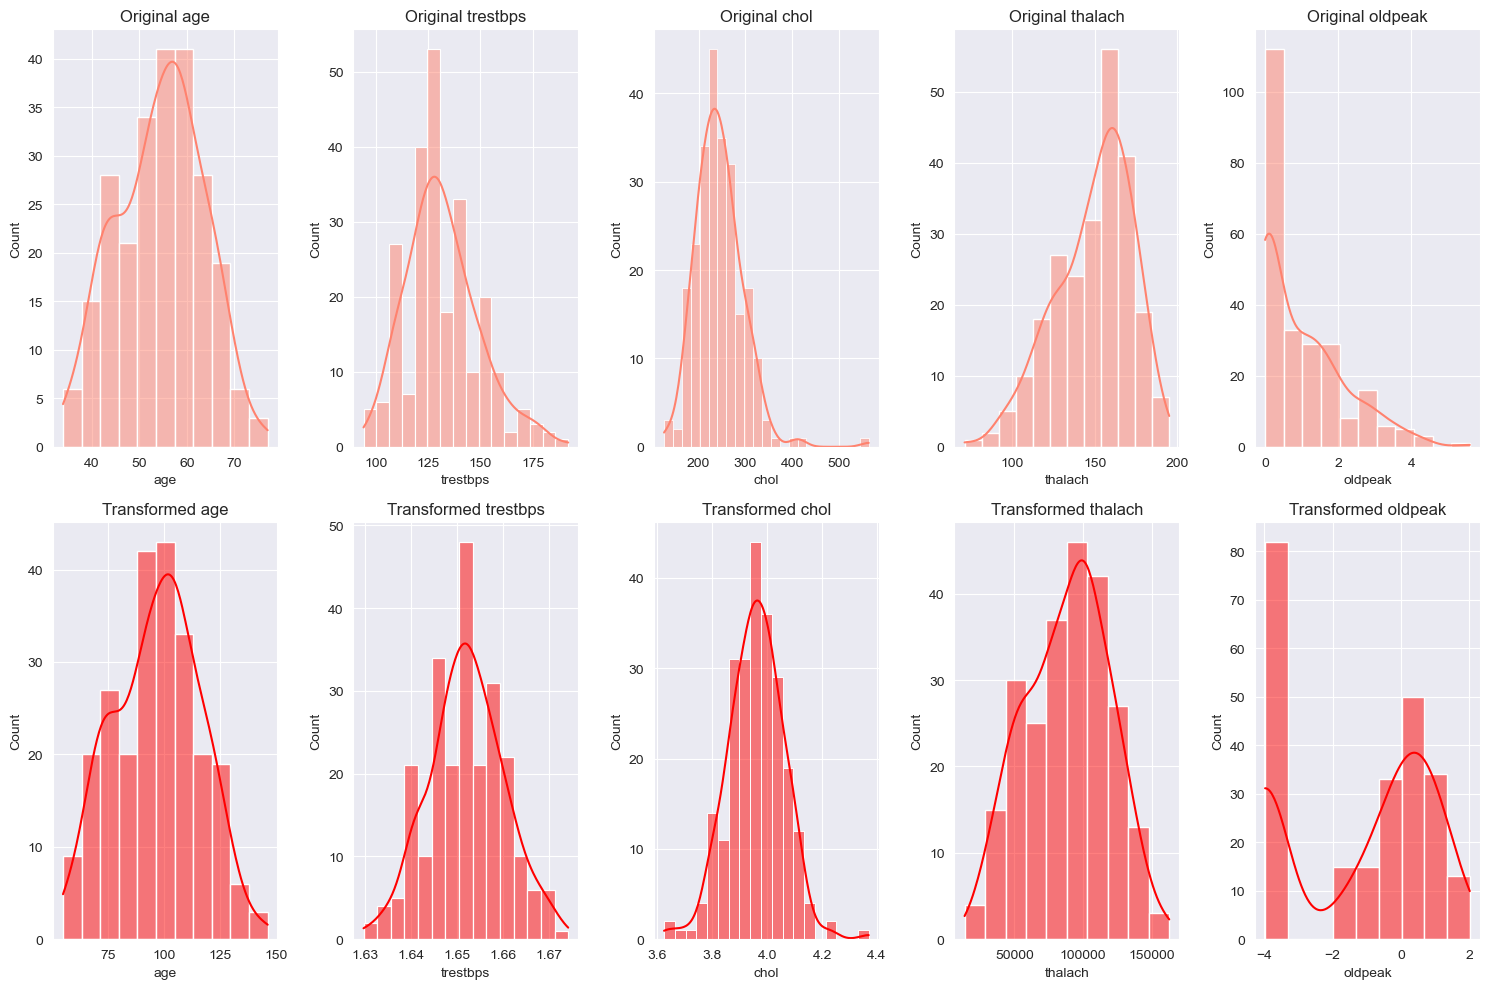

In [19]:
# Tao bieu do phan phoi cac dac bien lien tuc
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Ve phan phoi goc (truoc khi bien doi)
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')

# Ap dung Box-Cox Transformation
lambdas = {}

for i, col in enumerate(continuous_features):
    # Chi ap dung neu tat ca gia tri cua bien la duong
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

# Hien thi do thi
fig.tight_layout()
plt.show()

Các tính năng biến đổi thành bình thường hơn chủ yếu giúp giảm thiểu tác động của các ngoại lệ, đặc biệt có lợi cho các thuật toán dựa trên khoảng cách như SVM và KNN. Bằng cách giảm ảnh hưởng của các ngoại lệ, đảm bảo rằng các thuật toán này có thể tính toán khoảng cách hiệu quả hơn và tạo ra kết quả đáng tin cậy hơn.

In [20]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775363,1,1.652121,4.044511,1,34193.227632,1,0.490856,0,0,False,False,False,False,False,False,False,True
191,104.060287,1,1.651135,3.909224,0,61564.640490,1,0.846853,1,3,False,False,False,False,False,False,False,True
15,87.096593,0,1.646936,3.916243,0,97354.894861,0,0.490856,1,0,False,True,False,True,False,False,True,False
224,95.519188,1,1.641027,3.960431,0,55975.891019,1,1.130195,1,1,False,False,False,True,False,False,False,True
250,89.190732,1,1.656715,4.069855,0,51729.486474,1,1.634849,1,3,False,False,False,True,False,False,False,True


## Model Building

### Decision Tree

In [21]:
# Khoi tao mo hinh DT
dt_base = DecisionTreeClassifier(random_state=0)

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    Hàm tune_clf_hyperparameters này được sử dụng để tìm kiếm và tối ưu hóa siêu tham số cho một mô hình phân loại (Classifier) bằng cách sử dụng GridSearchCV và Cross-Validation với chiến lược StratifiedKFold.
    '''
    
    # Tao doi tuong Cross-Validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Tao doi tuong GridSearchCV
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Huan luyen & tim sieu tham so tot nhat
    clf_grid.fit(X_train, y_train)

    # Lay sieu tham so toi uu
    best_hyperparameters = clf_grid.best_params_

    # Tra ve mo hinh tot nhat & sieu tham so
    return clf_grid.best_estimator_, best_hyperparameters


# Bo luoi sieu tham so (Hyperparameter Grid) cho DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Goi ham toi uu hoa
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu huan luyen
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [23]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu kiem tra
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



Cho rằng các giá trị số liệu cho cả bộ dữ liệu đào tạo và kiểm tra được liên kết chặt chẽ và không khác biệt đáng kể, mô hình dường như không quá mức.

Hãy tạo một chức năng củng cố số liệu của mỗi mô hình thành một khung dữ liệu, tạo điều kiện cho việc so sánh đầu cuối của tất cả các mô hình sau:

In [24]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Hàm evaluate_model đánh giá hiệu suất của một mô hình đã được huấn luyện trên tập dữ liệu kiểm tra (X_test, y_test) bằng cách sử dụng nhiều chỉ số đo lường.
    """
    
    # Du doan nhan cua tap kiem tra
    y_pred = model.predict(X_test)

    # Tao bao cao phan loai (Classification Report)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Trich xuat cac chi so do luong hieu suat cua mo hinh
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Chuyen doi ket qua thanh DataFrame
    data = pd.DataFrame(metrics, index=[model_name]).round(2)
    return data

# Danh gia hieu suat mo hinh DT
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


### Random Forest

In [25]:
# Khoi tao mo hinh RF
rf_base = RandomForestClassifier(random_state=0)

# Bo luoi sieu tham so (Hyperparameter Grid) cho RF
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Toi uu Hyperparameters = Grid Search & Cross Validation
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

# In ra hyperparameters toi uu nhat
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


In [26]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu huan luyen
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [27]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu kiem tra
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Hiệu suất tương tự của mô hình RF trên cả dữ liệu đào tạo và kiểm tra cho thấy nó không quá mức.

In [28]:
# Danh gia hieu suat mo hinh RF
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


### K-Nearest Neighbors

In [39]:
# Xay dung Pipeline cho KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Bo luoi sieu tham so (Hyperparameter Grid) cho KNN
param_grid_knn = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Toi uu Hyperparameters = Grid Search & Cross Validation
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(pipeline_knn, param_grid_knn, X_train, y_train)

# In ra Hyperparameters toi uu nhat
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


In [30]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu huan luyen
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [31]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu kiem tra
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Điểm số nhất quán của mô hình KNN trên các bộ đào tạo và kiểm tra cho thấy không có quá mức.

In [32]:
# Danh gia hieu suat mo hinh KNN
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


### Support Vector Machine

In [33]:
# Xay dung Pipeline cho SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Bo luoi sieu tham so (Hyperparameter Grid) cho SVM
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

# Toi uu Hyperparameters = Grid Search & Cross Validation
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(pipeline_svm, param_grid_svm, X_train, y_train)

# In ra Hyperparameters toi uu nhat
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [34]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu huan luyen
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [35]:
# Danh gia mo hinh da duoc toi uu tren tap du lieu kiem tra
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



Nhìn chung, hiệu suất của mô hình hứa hẹn cho chẩn đoán y tế, đặc biệt là khi ưu tiên xác định chính xác bệnh nhân mắc bệnh tim mà không làm quá tải hệ thống bằng báo động sai.

In [36]:
# # Danh gia hieu suat mo hinh SVM
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


## Conclusion

In [37]:
# Gop ket qua danh gia cua cac mo hinh
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sap xep 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84
DT,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


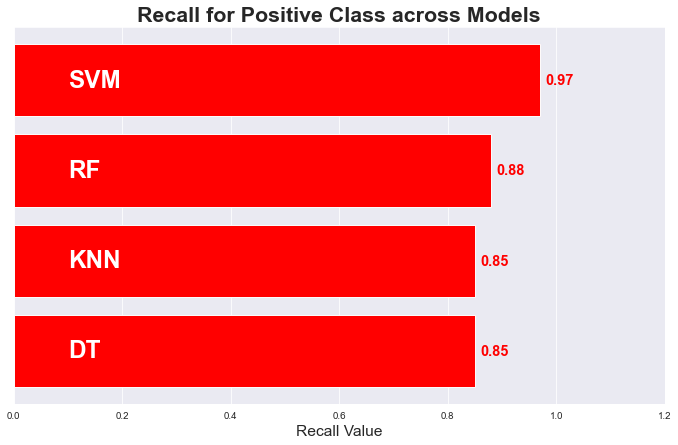

In [38]:
# Sap xep lai ket qua theo 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Tao bieu do thanh ngang (Horizontal Bar Chart)
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Ghi chu gia tri len bieu do
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Tuy chinh bieu do
ax.set_yticks([])
ax.set_xlim([0, 1.2])
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

Mô hình SVM cho thấy khả năng đáng khen ngợi trong việc nhận biết bệnh nhân tim tiềm năng. Với việc thu hồi 0,97 cho lớp 1, rõ ràng là hầu hết tất cả bệnh nhân mắc bệnh tim đều được xác định chính xác. Đây là điều tối quan trọng trong một môi trường y tế. Tuy nhiên, hiệu suất cân bằng của mô hình đảm bảo rằng trong khi nhắm đến việc thu hồi cao, nó không ảnh hưởng đến độ chính xác, do đó không làm quá tải hệ thống với các cảnh báo không cần thiết.